In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x


2023-11-01 14:55:48.400270: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
x_train = x_train[:5000]
x_test = x_test[:5000]
y_train = y_train[:5000]
y_test = y_test[:5000]

In [4]:
# Load VGG16 without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze some layers
for layer in model.layers[:15]:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
157/157 [==============================] - 64s 399ms/step - loss: 1.4681 - accuracy: 0.4856 - val_loss: 1.1852 - val_accuracy: 0.5828
Epoch 2/10
157/157 [==============================] - 62s 397ms/step - loss: 0.9610 - accuracy: 0.6600 - val_loss: 1.1665 - val_accuracy: 0.5956
Epoch 3/10
157/157 [==============================] - 63s 402ms/step - loss: 0.7483 - accuracy: 0.7446 - val_loss: 1.0414 - val_accuracy: 0.6366
Epoch 4/10
157/157 [==============================] - 62s 395ms/step - loss: 0.5621 - accuracy: 0.8062 - val_loss: 1.0953 - val_accuracy: 0.6408
Epoch 5/10
157/157 [==============================] - 67s 427ms/step - loss: 0.4107 - accuracy: 0.8586 - val_loss: 1.1551 - val_accuracy: 0.6490
Epoch 6/10
157/157 [==============================] - 64s 406ms/step - loss: 0.2508 - accuracy: 0.9208 - val_loss: 1.2766 - val_accuracy: 0.6488
Epoch 7/10
157/157 [==============================] - 68s 431ms/step - loss: 0.1567 - accuracy: 0.9530 - val_loss: 1.3237 - val_ac

In [5]:
model.evaluate(x_test, y_test)

157/157 [==============================] - 9s 56ms/step - loss: 1.7236 - accuracy: 0.6622


[1.7236108779907227, 0.6621999740600586]

In [6]:
e = model.predict(x_test)

157/157 [==============================] - 9s 60ms/step


In [10]:
import numpy as np

In [17]:
np.argmax(e[10])

0

In [18]:
np.argmax(y_test[10])

0

In [19]:
import matplotlib.pyplot as plt

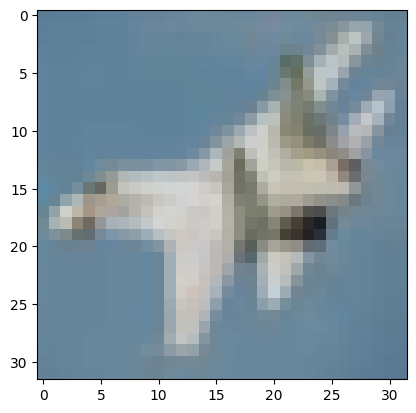

In [21]:
plt.imshow(x_test[10])